# <center>2018 Elections - Progresive Victories in the Democratic Primaries</center>
### <center>Udacity Data Analysis Nano-Degree / by Aviad Giat</center>
# <center><span style="color:#a2b8bc">Preliminary Wrangling</span></center>



### Table of Contents
1. [Import the data](#Import-the-data) <br>
2. [Check for missing data](#Check-for-missing-data) <br>
2. [Explore ONLY the descriptive columns (missing values)](#Explore-ONLY-the-descriptive-columns) <br>
2. [Add missing winnings](#Add-missing-winnings) <br>
2. [Inspect the dataset](#Inspect-the-dataset) <br>
2. [Find unique values in columns](#Find-unique-values-in-columns) <br>
2. [Reshape and tidy-up the dataset](#Reshape-and-tidy-up-the-dataset) <br>
2. [Add missing Guns Sense endorsements](#Add-missing-Guns-Sense-endorsements) <br>
2. [Add Bernie Sanders and Joe Biden missing endorsements](#Add-Bernie-Sanders-and-Joe-Biden-missing-endorsements) <br>
2. [Inspect the cleaned dataframe](#Inspect-the-cleaned-dataframe) <br>
2. [Refine the updated dataset](#Refine-the-updated-dataset) <br>
2. [Inspect the variables with Autovizwidget](#Inspect-the-variables-with-Autovizwidget) <br>
2. [Dataset structure](#Dataset-structure) <br>
2. [Dicussion about the preliminary wrangling and variables to analyze](#Dicussion-about-the-preliminary-wrangling-and-variables-to-analyze)<br>
2. [Main assumption](#Main-assumption)

### Data main source
I obtained the data used in this analysis from Five Thirty Eight's <a href="https://github.com/fivethirtyeight/data/tree/master/primary-candidates-2018">Github repository</a>.<br>
I also added completing data from other sources to acheive better and more accurate analysis. More information about them further down this file.

### Import libraries

In [289]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.core.display import display, HTML # Add html to python code
import missingno as ms # Visualization of nulity in the dataset

### Change some HTML properties for the entire notebook

In [290]:
%%html
<style>.output_wrapper, .output {height:auto !important; max-height:10000px;
                                }.output_scroll {box-shadow:none !important; webkit-box-shadow:none !important;}</style>

### Check Python working directory

In [291]:
pwd

'C:\\Users\\Aviad\\Google Drive\\Studies\\Data Analysis\\Data Visualization\\Data Visualizations with Python\\Explanatory Visualizations\\project'

Back to [top](#Preliminary-Wrangling)

### Import the data

In [292]:
# Import the data
datademocrats = pd.read_csv('dem_candidates.csv')
datademocrats.head()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,Primary %,Won Primary,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,STEM?,Obama Alum?,Party Support?,Emily Endorsed?,Guns Sense Candidate?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,3.42,No,Nonwhite,Yes,No,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,1.74,No,White,No,Yes,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,3.27,No,White,Yes,No,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,James C. Fields,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,8.00,No,Nonwhite,Yes,No,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sue Bell Cobb,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,None,None,-28.879999,28.98,No,White,No,No,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Back to [top](#Preliminary-Wrangling)

### Check for missing data

Missing data matrix AxesSubplot(0.125,0.125;0.698618x0.755)


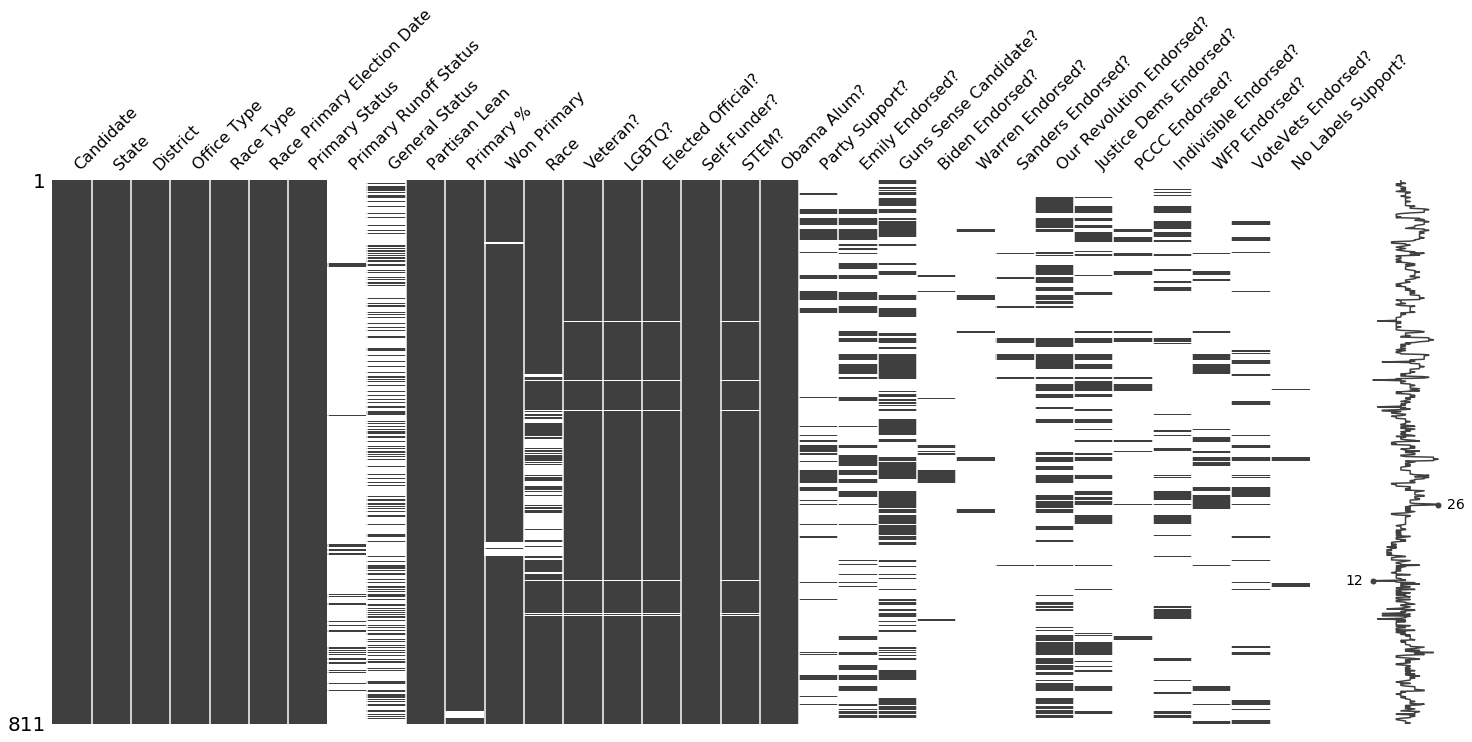

In [293]:
# Replace Nones with numpy's nan
datademocrats = datademocrats.replace("None", np.nan)

# Using a matrix from the missingno module
print("Missing data matrix",ms.matrix(datademocrats))

Above is a matrix of the variables with missing data. Black represent existing data and white lack of data.<br>

We can see above that the first variables from the left do not have, or have very little, missing data (except two columns), compare to the variables on the right which are missing more data that having data. <br>

This pretty much separates the data set into two parts. One is the basic info about the candidate and the election results (descriptive data) and the other is mostly endorsements by pacs and individuals (endorsements data).<br>

Since we have 800 candidates and since the dataframe is wide, and since the endorsements columns fit all under one category, I will change the structure of the dataframe to be long, rather than wide.<br>

Other interesting things that poped up to me looking at this matrix:
* The percent of votes candidates received in their election has a bunch of missing data at the bottom. The result of the election in the "Primary %" column is also missing from various rows. That might skew the analysis, thus I will check the missing data and see what to do with it.
* "Race"descriptive column is missing significant amount of data.

Back to [top](#Preliminary-Wrangling)

### Explore ONLY the descriptive columns


Bar chart for missing data by column AxesSubplot(0.125,0.125;0.775x0.755)


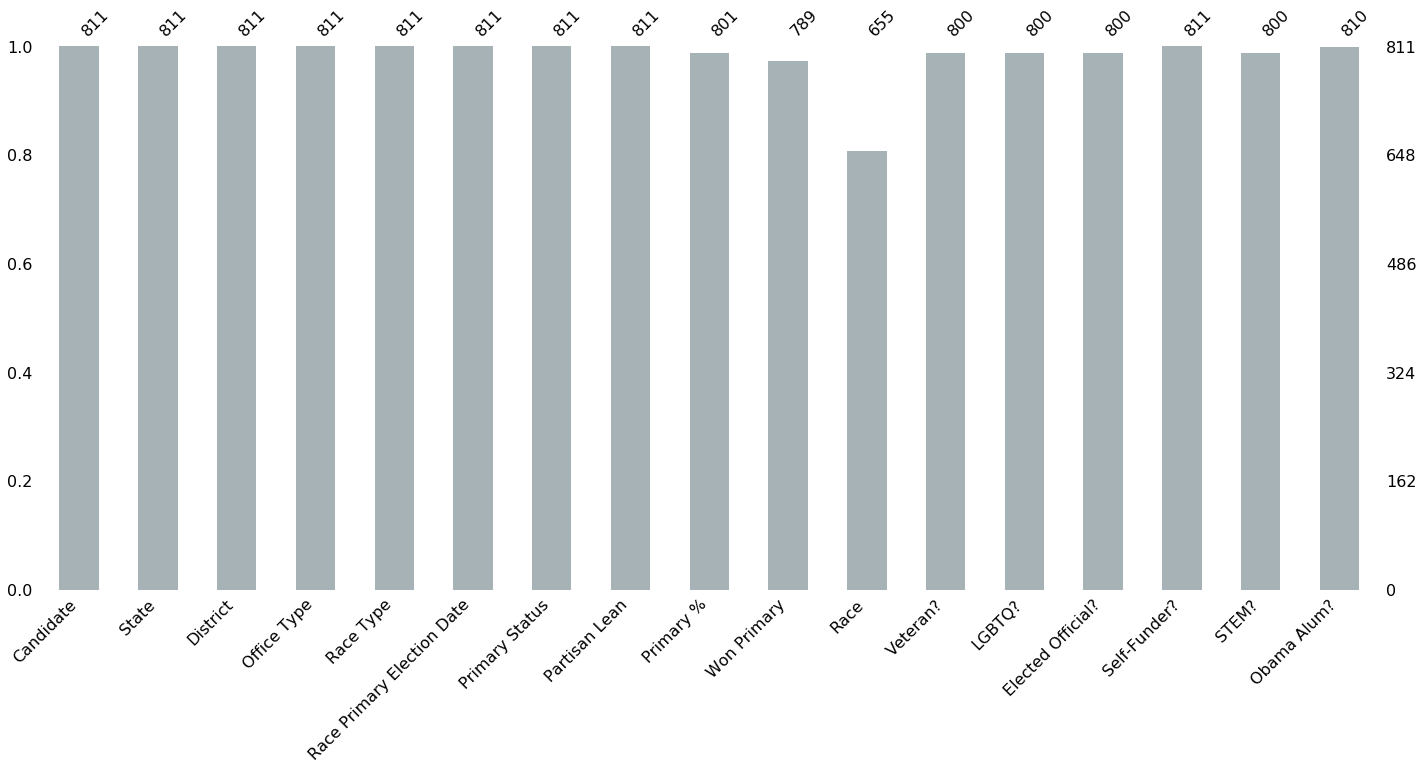

In [294]:
# Subset the dataframe with ONLY the descriptive columns to explore NONEs
descriptive_vars = datademocrats.loc[:, :'Obama Alum?']

# Drop the two decriptive data-missing variables, which I will not work with in this project
descriptive_vars = descriptive_vars.drop(['Primary Runoff Status','General Status'], axis = 1)

# Find missing data in the descriptive variables
print("\nBar chart for missing data by column", ms.bar(descriptive_vars, color='#a6b2b5'))

We can see that the race column has many missing values compare to the rest of the descriptive variables.<br>
Lte's see how many missing values in each column:

In [295]:
# Missing values for each column:
descriptive_vars_missing = descriptive_vars[descriptive_vars.isnull().any(axis=1)]
descriptive_vars_missing_count = descriptive_vars_missing.isnull().sum().sort_values()
print(descriptive_vars_missing_count)

Candidate                       0
State                           0
District                        0
Office Type                     0
Race Type                       0
Race Primary Election Date      0
Primary Status                  0
Partisan Lean                   0
Self-Funder?                    0
Obama Alum?                     1
Primary %                      10
Veteran?                       11
LGBTQ?                         11
Elected Official?              11
STEM?                          11
Won Primary                    22
Race                          156
dtype: int64


We can see in this table how many missing data values each column has with the actual numbers. <br>
I will statrt adding missing data now:

Back to [top](#Preliminary-Wrangling)

### Add missing winnings

In [296]:
### Add missing values to candidates without a winning resolution with data from Ballotpedia

#Change the 'Won Primary' to 'Yes', after reaserching and finding that those candidate won the primaries.
datademocrats.loc[datademocrats["Candidate"].isin(['Jason Nichols', 'Mary Brannon', 'Kendra Horn']),  'Won Primary'] = 'Yes' 

# Change the result in 'Won Primary' to 'No' if 'Primary Status' is 'Lost'.
datademocrats.loc[datademocrats['Primary Status'] == 'Lost', 'Won Primary'] = 'No'

# Change 'Won Primary' to 'No' for the rest of the NaNs, after finding that they all lost.
datademocrats.loc[datademocrats['Won Primary'].isna(), 'Won Primary'] = 'No'

# Check that there is no one left without a winning resolution
datademocrats.loc[datademocrats['Won Primary'].isna()]

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,Primary %,Won Primary,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,STEM?,Obama Alum?,Party Support?,Emily Endorsed?,Guns Sense Candidate?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?


Now we should have all the records of the 'Won Primary' variables correctly. This will make the analysis more accurate and accountable.

Back to [top](#Preliminary-Wrangling)

### Inspect the dataset 

In [312]:
# high-level overview of data shape and composition

# Set ipython's max row display
# pd.set_option('display.max_row', 811)

# Set iPython's max column width to 32
pd.set_option('display.max_columns', 32)

#Length of rows and columns
print("\033[1mDataframe length and width\033[0m",datademocrats.shape,"\n")

# Extract the columns' names, if they have empty values and what type of data they are
print("\033[1mVriable types\033[0m")
print(datademocrats.info())

# Show the first lines of the dataframe
print("\n\033[1mThe first lines of the original dataframe\033[0m");
datademocrats.head(3)

Dataframe length and width (811, 32) 

Vriable types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 32 columns):
Candidate                     811 non-null object
State                         811 non-null object
District                      811 non-null object
Office Type                   811 non-null object
Race Type                     811 non-null object
Race Primary Election Date    811 non-null object
Primary Status                811 non-null object
Primary Runoff Status         44 non-null object
General Status                239 non-null object
Partisan Lean                 811 non-null float64
Primary %                     801 non-null float64
Won                           811 non-null object
Race                          655 non-null object
Veteran?                      800 non-null object
LGBTQ?                        800 non-null object
Elected Official?             800 non-null object
Self-Funder?                  811 non-nul

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,Primary %,Won,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,STEM?,Obama Alum?,Party Support?,Emily Endorsed?,Guns Sense Candidate?,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,Anthony White (Alabama),AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,3.42,No,Nonwhite,Yes,No,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Christopher Countryman,AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,1.74,No,White,No,Yes,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Doug ""New Blue"" Smith",AL,Governor of Alabama,Governor,Regular,6/5/18,Lost,NaN,NaN,-28.879999,3.27,No,White,Yes,No,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's try to see how many unique values some of the columns have.

Back to [top](#Preliminary-Wrangling)

### Find unique values in columns 

In [298]:
# Find all the unique values from all columns except 'Candidate', 'Primary %', 'Partisan Lean' and 'District' columns.
for col in datademocrats.loc[:, ~datademocrats.columns.isin(['Candidate', 'Primary %', 'District', 'Partisan Lean'])]:
    print("\033[1mUniqe values \033[0mfor the\033[1m",col, "\033[0mvariable")
    print(datademocrats[col].unique(), "\n")

# Find all the unique values from all columns by numbers
print("\n\033[1mThe number of unique values for each variable\033[0m\n", datademocrats.nunique())

Uniqe values for the State variable
['AL' 'AR' 'AZ' 'CA' 'CO' 'GA' 'IA' 'ID' 'IL' 'IN' 'KS' 'KY' 'MD' 'ME'
 'MI' 'MO' 'MS' 'MT' 'NC' 'ND' 'NE' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR'
 'PA' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'WA' 'WV'] 

Uniqe values for the Office Type variable
['Governor' 'Representative' 'Senator'] 

Uniqe values for the Race Type variable
['Regular' 'Special'] 

Uniqe values for the Race Primary Election Date variable
['6/5/18' '5/22/18' '2/27/18' '6/26/18' '5/15/18' '3/20/18' '5/8/18'
 '8/7/18' '6/12/18' '8/2/18' '3/6/18'] 

Uniqe values for the Primary Status variable
['Lost' 'Advanced'] 

Uniqe values for the Primary Runoff Status variable
[nan 'Lost' 'Advanced' 'On the Ballot'] 

Uniqe values for the General Status variable
[nan 'On the Ballot'] 

Uniqe values for the Won Primary variable
['No' 'Yes'] 

Uniqe values for the Race variable
['Nonwhite' 'White' nan] 

Uniqe values for the Veteran? variable
['Yes' 'No' nan] 

Uniqe values for the LGBTQ? variable
['No' 'Yes' na

The dataframe is a wide one. (a lot of variables)
Since some of the variables fall into one category (Endorsements), I will put them all under a new column called "Endorsements". That would reshape the dataframe to be longer, and its width would shorten meaningfuly.
To be able to understand the progressives' statistics in those elections, I will add a variable that says if the candidate is a Progressive one, or not, based on its affiliation with 3 different Progressive pacs.

Back to [top](#Preliminary-Wrangling)

### Reshape and tidy-up the dataset

In [299]:
# Change column names
datademocrats.rename(columns={'Won Primary': 'Won'}, inplace=True)

# Drop the two decriptive data-missing variables, which I will not work with in this project
# datademocrats = datademocrats.drop(['Primary Runoff Status','General Status'], axis = 1)

# Change the Null value in "Won" to the "Primary Status" column value
datademocrats.loc[datademocrats['Won'].isnull(),'Won'] = datademocrats['Primary Status']


# Narrow the scope of the variables and "melt" some variables to one column (Endorsements)
datadem_tidy = pd.melt(datademocrats,
                       id_vars = ["Candidate", "State", "Office Type","Race Primary Election Date", "Partisan Lean", "Primary %", "Won", "Race", "Veteran?","LGBTQ?", "Elected Official?", "Self-Funder?"], 
                       value_vars=["Party Support?", "Emily Endorsed?", "Guns Sense Candidate?", "Biden Endorsed?", "Sanders Endorsed?", "PCCC Endorsed?", "Indivisible Endorsed?","Our Revolution Endorsed?", "Justice Dems Endorsed?", "WFP Endorsed?", "VoteVets Endorsed?"],                     
                       var_name='Endorsements')

# Replace pandas' None with No 
datadem_tidy.value = datadem_tidy.value.replace({pd.np.nan: "No"})

# Change the Endorsement value to No if the variable "value" is "No"
datadem_tidy.loc[datadem_tidy.value == 'No', 'Endorsements'] = 'No'

# Drop duplicated rows
datadem_tidy = datadem_tidy.drop_duplicates()

# Add a column with the Progressive packs and Corporate pacs
def progressive(row):
    if row['Endorsements'] == 'Justice Dems Endorsed?' and row['value'] == 'Yes':
        return 'Yes'
    elif row['Endorsements'] == 'Our Revolution Endorsed?' and row['value'] == 'Yes':
        return 'Yes'
    elif row['Endorsements'] == 'PCCC Endorsed?' and row['value'] == 'Yes':
        return 'Yes'
    else:
        return 'No'
datadem_tidy['Progressive'] = datadem_tidy.apply(progressive, axis=1)

# Sort the new dataframe by Candidate
datadem_tidy = datadem_tidy.sort_values(ascending=True, by="Candidate")

# Change column name
dm = datadem_tidy.rename(columns = {'Race Primary Election Date':'Date'})

# Save changes to a new csv file for use in Exploration 2 (Bi-variate analysis)
dm.to_csv('dm.csv', index=False)


Looking at the number of endorsements for each pac (on the Exploration2 file), I found that Bernie Sanders and Joe Biden had very few endorsements, which seems a little weird with their long-term political work and their pivot role in the Democratic party.<br>
After doing some research I found that Bernie Sanders had more endorsements in the 2018 elections than what I shows in the above Five Thirty Eight's dataset. Researching other endorsers, I found that they were also missing candidates of all 3 types of seats that are the scope of this project (Senator, Representative and Governor). In order to correct that missing data, I will add the <a href="https://ballotpedia.org/Endorsements_by_Joe_Biden">full data (from ballotpedia.org)</a> for each endorser to my working space, except Elizabeth Warren, whom I couldn't find enough relevant data about, so I left her out of the analysis.

Back to [top](#Preliminary-Wrangling)

### Add missing Guns Sense endorsements
Import the csv file I created from copying and pasting data from <a href="https://gunsensevoter.org/endorsed-2018/">Guns Sens website</a> with all their endorsements for the 2018 elections.

In [300]:
# Upload the data
guns = pd.read_csv('guns_sense.csv')

# dropping null value columns to avoid errors 
guns.dropna(inplace = True) 

# new data frame with split value columns 
guns["ALASKA"]= guns["ALASKA"].str.split(",", n = 1, expand = True)

# Add "Guns Sense' to the Endorsements column in the primary dataset if the candidate name appears in the 'Guns Sense' list that I imported from their website (guns_sense.csv)
dm.loc[dm.Candidate.isin(guns.ALASKA), 'Endorsements'] = 'Guns Sense Candidate?'

# Remove 'Yes' under the Progressive colomn from Guns Sense
dm.loc[dm['Endorsements'] == 'Guns Sense Candidate?', 'Progressive'] = "No"

Back to [top](#Preliminary-Wrangling)

### Add Bernie Sanders and Joe Biden missing endorsements
Upload the data from a new csv file I created from copying and pasting the data from <a href="https://ballotpedia.org/Endorsements_by_Joe_Biden">Ballotpedia.org</a> into an Excel sheet.

In [301]:
us_state_abbrev = {
    'Alabama': 'AL',    'Alaska': 'AK',    'Arizona': 'AZ',    'Arkansas': 'AR',    'California': 'CA',    'Colorado': 'CO',    'Connecticut': 'CT',    'Delaware': 'DE',    'Florida': 'FL',    'Georgia': 'GA',    'Hawaii': 'HI',    'Idaho': 'ID',    'Illinois': 'IL',    'Indiana': 'IN',    'Iowa': 'IA',    'Kansas': 'KS',    'Kentucky': 'KY',    'Louisiana': 'LA',    'Maine': 'ME',    'Maryland': 'MD',    'Massachusetts': 'MA',    'Michigan': 'MI',    'Minnesota': 'MN',    'Mississippi': 'MS',
    'Missouri': 'MO',    'Montana': 'MT',    'Nebraska': 'NE',    'Nevada': 'NV',    'New Hampshire': 'NH',    'New Jersey': 'NJ',    'New Mexico': 'NM',    'New York': 'NY',    'North Carolina': 'NC',    'North Dakota': 'ND',    'Ohio': 'OH',    'Oklahoma': 'OK',    'Oregon': 'OR',    'Pennsylvania': 'PA',    'Rhode Island': 'RI',    'South Carolina': 'SC',    'South Dakota': 'SD',    'Tennessee': 'TN',    'Texas': 'TX',    'Utah': 'UT',    'Vermont': 'VT',    'Virginia': 'VA',    'Washington': 'WA',    'West Virginia': 'WV',    'Wisconsin': 'WI',    'Wyoming': 'WY',}

In [302]:
# Upload the csv file and create a new dataframe
san_bid = pd.read_csv('sanders_biden.csv')

# Clean the candidate column - Leave only the name and remove the rest of the data from the string
san_bid['Candidate'] = san_bid['Candidate'].str.replace('\(D\)', '')
san_bid['Candidate'] = san_bid['Candidate'].str.replace('\[.*\]', '')

# Fix the state column - Remove all charachters after the first two letters of the state initials
san_bid['State1'] = san_bid['State'].str.split('-').str[0]
san_bid['State'] = san_bid['State1']

# Change few of the state names to full name in order to align all states names before abbreviating
san_bid['State'].replace(to_replace=dict(PA= 'Pennsylvania', SC= 'South Carolina', TX = 'Texas',
                                   UT = 'Utah', VA = 'Virginia', WA = 'Washington', WI = 'Wisconsin'), inplace=True)

# Abbreviate all states names
san_bid['State'].replace(to_replace=dict(us_state_abbrev), inplace=True)

# Change column name to match the primary dataset
san_bid.rename(columns={'General Result': 'Won'}, inplace=True)

# Replace values inside the Won column to fit the primary dataframe
san_bid.Won = san_bid.Won.replace({'\xa0Won': "Yes", '\xa0Defeated': "No", '\xa0Lost': "No"})

# Drop column
del san_bid['State1']

# Change the 'Won' values to match the primary dataset's values
san_bid['Won'].replace(to_replace=dict(Won= 'Yes', Defeated= 'No', Lost = 'No'))
# Add the new dataset (sb) to the main dataset (dm)
dem = pd.merge(dm, san_bid, how='outer', on=['Candidate','State', 'Won', 'Endorsements', 'Office Type'])

# Replace pandas' None with No 
dem.Progressive = dem.Progressive.replace({pd.np.nan: "No"})
dem.value = dem.value.replace({pd.np.nan: "No"})
dem['Self-Funder?'] = dem['Self-Funder?'].replace({pd.np.nan: "No"})
dem['Elected Official?'] = dem['Elected Official?'].replace({pd.np.nan: "No"})
dem['LGBTQ?'] = dem['LGBTQ?'].replace({pd.np.nan: "No"})
dem['Veteran?'] = dem['Veteran?'].replace({pd.np.nan: "No"})

# Remove rows that have the same Candidate name and Endorsement
dem = dem.drop_duplicates(subset=['Candidate','Endorsements'], keep='first')

Back to [top](#Preliminary-Wrangling)

### Refine the updated dataset

In [303]:
# Add "Guns Sense' to the Endorsements column in the primary dataset if the candidate name appears in the 'Guns Sense' list that I imported from their website (guns_sense.csv)
dm.loc[dm.Candidate.isin(guns.ALASKA), 'Endorsements'] = 'Guns Sense Candidate?'

# Add the new dataset (sb) to the main dataset (dm)
dem = pd.merge(dm, san_bid, how='outer', on=['Candidate','State', 'Won', 'Endorsements', 'Office Type'])

# Replace pandas' None with No 
dem.Progressive = dem.Progressive.replace({pd.np.nan: "No"})
dem.value = dem.value.replace({pd.np.nan: "No"})
dem['Self-Funder?'] = dem['Self-Funder?'].replace({pd.np.nan: "No"})
dem['Elected Official?'] = dem['Elected Official?'].replace({pd.np.nan: "No"})
dem['LGBTQ?'] = dem['LGBTQ?'].replace({pd.np.nan: "No"})
dem['Veteran?'] = dem['Veteran?'].replace({pd.np.nan: "No"})


# Change the 'Won' values to match the primary dataset's values
dem['Won'] = dem['Won'].replace(to_replace=dict(Advanced = 'Yes', Won= 'Yes', Defeated= 'No', Lost = 'No'))

# Remove '\xa0' from the Candidate column's string
dem['Candidate'] = dem['Candidate'].str.replace('\\xa0', '')

# Remove rows that have the same Candidate name and Endorsement
dem = dem.drop_duplicates(subset=['Candidate','Endorsements'], keep='last')

# Remove row that has 'Pending'
dem =  dem[dem.Candidate != 'Dan McCready']

# Round numbers to 1 decimal
dem = dem.round({'Primary %': 1, 'Partisan Lean': 1})

# Change value for the candidates in 'Won Primary' to 'No', after finding out that the record is wrong.
dem.loc[dem['Candidate'] == 'Tom Guild', 'Won'] = 'No'
dem.loc[dem['Candidate'] == 'Amanda Douglas', 'Won'] = 'No'
dem.loc[dem['Candidate'] == 'Tom Guild', 'Won'] = 'No'

# Save changes to a new csv file for use in Exploration 2 (Bi-variate analysis)
dem.to_csv('dem.csv', index=False)

# Import the new data from the new csv file
test = pd.read_csv('dem.csv')
test.head()

,Candidate,State,Office Type,Date,Partisan Lean,Primary %,Won,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,Endorsements,value,Progressive
0,A.J. Balukoff,ID,Governor,5/15/18,-34.3,40.1,No,White,No,No,No,Yes,No,No,No
1,Aaron Godfrey,OH,Representative,5/8/18,-17.0,7.9,No,NaN,No,No,No,No,Our Revolution Endorsed?,Yes,Yes
2,Aaron Godfrey,OH,Representative,5/8/18,-17.0,7.9,No,NaN,No,No,No,No,Guns Sense Candidate?,Yes,No
3,Aaron Godfrey,OH,Representative,5/8/18,-17.0,7.9,No,NaN,No,No,No,No,No,No,No
4,Aaron Scheinberg,WV,Representative,5/8/18,-35.3,37.4,No,White,Yes,No,No,No,VoteVets Endorsed?,Yes,No


In [305]:
dem[dem['Endorsements'] == 'Sanders Endorsed?']

,Candidate,State,Office Type,Date,Partisan Lean,Primary %,Won,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,Endorsements,value,Progressive
553,James Thompson,KS,Representative,8/7/18,-29.3,65.3,Yes,White,Yes,No,No,No,Sanders Endorsed?,Yes,No
1370,Jacky Rosen,NV,Senator,NaN,NaN,NaN,Yes,NaN,No,No,No,No,Sanders Endorsed?,No,No
1371,Tammy Baldwin,WI,Senator,NaN,NaN,NaN,Yes,NaN,No,No,No,No,Sanders Endorsed?,No,No
1372,Ammar Campa-Najjar,CA,Representative,NaN,NaN,NaN,No,NaN,No,No,No,No,Sanders Endorsed?,No,No
1373,Barbara Lee,CA,Representative,NaN,NaN,NaN,Yes,NaN,No,No,No,No,Sanders Endorsed?,No,No
1374,Mike Levin,CA,Representative,NaN,NaN,NaN,Yes,NaN,No,No,No,No,Sanders Endorsed?,No,No
1375,Joe Neguse,CO,Representative,NaN,NaN,NaN,Yes,NaN,No,No,No,No,Sanders Endorsed?,No,No
1376,Sanjay Patel,FL,Representative,NaN,NaN,NaN,No,NaN,No,No,No,No,Sanders Endorsed?,No,No
1377,Brent Welder,KS,Representative,NaN,NaN,NaN,NaN,NaN,No,No,No,No,Sanders Endorsed?,No,No
1378,Jesus Garcia,IL,Representative,NaN,NaN,NaN,Yes,NaN,No,No,No,No,Sanders Endorsed?,No,No


Back to [top](#Preliminary-Wrangling)

### Inspect the cleaned dataframe

In [306]:
#Length of rows and columns in the new dataframe
print("\033[1mDataframe length and width\033[0m",test.shape,"\n")

# Show the columns' names, if they have empty values and what type of data they are
print("\033[1mVriable types\033[0m")
print(test.info(),"\n")

# Find all the unique values from all columns except 'Candidate', 'Primary %', 'Partisan Lean' and 'District' columns.
for col in test.loc[:, ~test.columns.isin(['Candidate', 'Primary %', 'District', 'Partisan Lean'])]:
    print("\033[1mUniqe values \033[0mfor the\033[1m",col, "\033[0mvariable")
    print(test[col].unique(), "\n")

# Find all the unique values from all columns by numbers
print("\n\033[1mThe number of unique values for each variable\033[0m\n", test.nunique().sort_values())

Dataframe length and width (1379, 15) 

Vriable types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 15 columns):
Candidate            1379 non-null object
State                1379 non-null object
Office Type          1379 non-null object
Date                 1259 non-null object
Partisan Lean        1259 non-null float64
Primary %            1243 non-null float64
Won                  1374 non-null object
Race                 1022 non-null object
Veteran?             1379 non-null object
LGBTQ?               1379 non-null object
Elected Official?    1379 non-null object
Self-Funder?         1379 non-null object
Endorsements         1379 non-null object
value                1379 non-null object
Progressive          1379 non-null object
dtypes: float64(2), object(13)
memory usage: 161.7+ KB
None 

Uniqe values for the State variable
['ID' 'OH' 'WV' 'IA' 'MI' 'VA' 'TX' 'NC' 'ME' 'NY' 'PA' 'AL' 'CA' 'KS'
 'MD' 'NJ' 'NV' 'KY' 'OK' 'IL' 'SC' 'N

As we can see above the dataframe has less volume with less variables, since we 'melted' various columns into one (Endorsements).<br>
It has now 1379 rows compare to 811 in the original dataframe and 15 variables compare to 32.

Back to [top](#Preliminary-Wrangling)

### Inspect the variables with Autovizwidget 
This widget is a great tool for initial exploration, to get a quick feeling of the dataset. I found with this widget the followings, by choosing the Pie chart with a single variable and with the 'Count' function. Results below

In [310]:
test_can_unique = test
test_can_unique = test_can_unique.drop_duplicates(['Candidate'], keep='first')
test_can_unique.head()

,Candidate,State,Office Type,Date,Partisan Lean,Primary %,Won,Race,Veteran?,LGBTQ?,Elected Official?,Self-Funder?,Endorsements,value,Progressive
0,A.J. Balukoff,ID,Governor,5/15/18,-34.3,40.1,No,White,No,No,No,Yes,No,No,No
1,Aaron Godfrey,OH,Representative,5/8/18,-17.0,7.9,No,NaN,No,No,No,No,Our Revolution Endorsed?,Yes,Yes
4,Aaron Scheinberg,WV,Representative,5/8/18,-35.3,37.4,No,White,Yes,No,No,No,VoteVets Endorsed?,Yes,No
6,Aaron Swisher,ID,Representative,5/15/18,-28.8,67.6,Yes,White,No,No,No,No,No,No,No
7,Abby Finkenauer,IA,Representative,6/5/18,-1.7,66.8,Yes,White,No,No,Yes,No,Emily Endorsed?,Yes,No


In [311]:
from autovizwidget.widget.utils import display_dataframe
display_dataframe(test_can_unique)

Output()

AutoVizWidget()

Back to [top](#Preliminary-Wrangling)

### Preliminary and a quick examination to the categorical variables

The 2018 Primaries were for the following positions:<br>
House Representative, with 83.1% of the candidates trying to win the nomination, Governor, with 12.6% and Senator with 4.3%. The Progressive movement comprised 11% of the total endorsed candidates who ran in the 2018 Democratic primaries. 41% of the candidates had an endorsement that appears in this dataset.<br>

The biggest endorsers were the Guns Sense with 14.1%, followed by Our Revolution, with 6.2% of the endorsements, and only 5.4% of the candidates were self-funded, compared to 94.6% who received financial contributions.<br>
18.8% were elected officials, which left about 80% of the race open to newcomers, which 4.5% of them were LGBTQ, 15.6% were Veterans and 70% were White.<br>

Of all candidates that ran in those primaries, 36% won, in 11 different voting days ranging from Feb 2018 to August 2018. Texas, California and New York had the highest number of candidates running in those primaries.<br />

I will delve into some of those variables in the [Uni-variant](Exploration2.ipynb), [Bi-variant](Exploration3.ipynb) and [Multi-valiant](Exploration4.ipynb) explorations, to reveal interesting insights about the progressive movement inside the Democratic party's 2018 primaries, starting with the file [Exploration2](Exploration2.ipynb).

* Some of the above number will change in the Exploration files and be more accurate and close to reality.

Back to [top](#Preliminary-Wrangling)

### Dataset structure

This dataset has 1379 observations (rows) representing the 2018 Democratic primaries elections' candidates and 15 variables (columns) with information about each observation. The dataset was a wide and a "messy" one, which I "melted" to be a long one for smoother work with the data. From the 15 variables 2 of them are numeric variables and the rest are categorical variables. 7 out of the 15 variables have 2 unique values. The "Endorsement" column hides inside all the columns's names from the original dataset that are endorsements (e.g. "Our Revolution Endorsed?", Justice Dems Endorsed?", etc.), which resulted from the melting process mentioned above. The column "value" holds a boolean value from the melted columns.


Back to [top](#Preliminary-Wrangling)

### Dicussion about the preliminary wrangling and variables to analyze

I started my wrangling with looking for missing data. I found that there is a lot of missing data, where some of it is normal, like in the Endorsements columns, and some of it missing in a way that it can distort the analysis results.
I went ahead and completed some of the missing data, which I found as a must and some I left as is. For example, I noticed that Bernie Sanders and Joe Biden had missing data, so I collected the missing data and inserted it into my working space, after munging it as well. I also found the missing data from the 'Won' column and completed it.
The original database came with many columns, which made it very hard to work with, so I 'melted' it and put all the columns that pretain to an endorsement under one column. This made everything much better to start off with. <br>

### Main variables to analyze

1. [Progressive](Exploration2.ipynb#Progressive) - How many Progressive candidates won the primaries, compare to non-Progressive candidates?<br> 
Candidates endorsed by the following 3 organizations were assigned 'yes' under the 'Progressive' column:<br>
"Justice Democrats", "Our Revolution" and "PCCC".<br>
All Progressive candidates pledged not to take any corporate PAC or corporate lobbyist money. Additionally, they will generally agree with the platform of one of those 3 organizations. Here is an example to a <a href="https://www.justicedemocrats.com/issues">Progressive platform</a>.<br>

2. [Endorsements](Exploration2.ipynb#Endorsements) - Which Pac (Political Action Committee and other types of endorsers, like the party itself or prominent figures in the Democratic realm, like Bernie Sanders) had the biggest effect on the 2018 Democratic primaries?

### Other variables that will support my analysis

1. [Primary Percent](Exploration2.ipynb#Percent) - The percentage of the vote received by the candidate in his or her primary. Numbers come from official results posted by the secretary of state or local elections authority; if those were unavailable, Five Thirty Eight used unofficial election results from the New York Times. Exploring this variable might help me understand the strength of the Progressive movement in a given state.

2. [Candidate](Exploration2.ipynb#Candidate) - I will use this variable in order to identify the most popular (among Endorsers) candidates.

3. [State](Exploration2.ipynb#State) - I will check how the Progressive candidates did in the different states.

4. [Race](Exploration2.ipynb#Race) - Was there a correlation between Race and Proressive candidates?

5. [Won](Exploration2.ipynb#Won) - I will compare other variables with this one to determine winners and losers.

### Main assumption
Progressive pacs in the 2018 Democratic primaries did better with winning primaries than non-Proressive pacs, compare to their size in the races. 

Back to [top](#Preliminary-Wrangling) | Continue with [Exploration2](Exploration2.ipynb)